# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 544.0 bytes


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

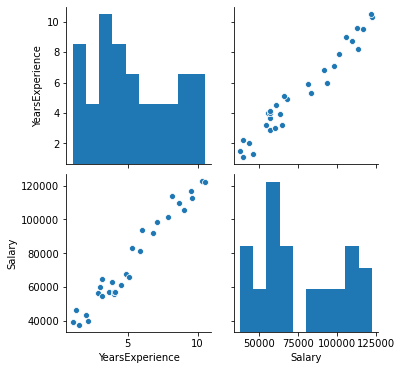

In [5]:
sns.pairplot(df)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


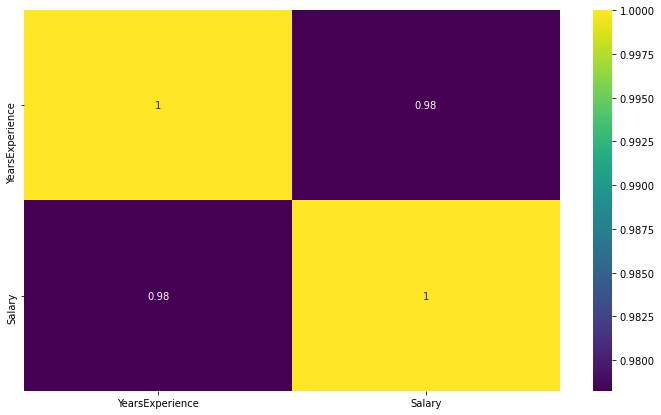

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

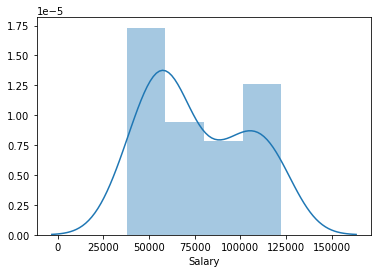

In [9]:
sns.distplot(df['Salary'])

In [10]:
df.corr()['Salary'].sort_values()

YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64

## Splitting the dataset into the Training set and Test set

In [11]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)


## Training the Simple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predicting the Test set results

In [14]:
ypred = regressor.predict(xtest)

## Visualising the Training set results

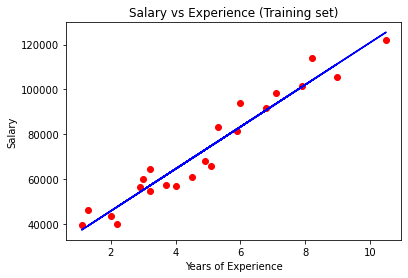

In [15]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

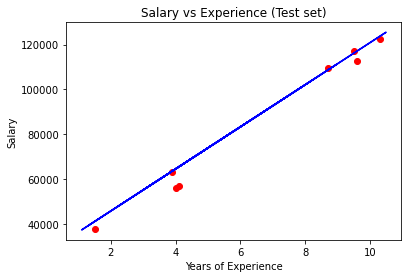

In [16]:
plt.scatter(xtest, ytest, color = 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Evaluation Matrix

In [27]:
from sklearn.metrics import *
print(f'R2: {r2_score(ytest,ypred)}\nMSE:-{mean_squared_error(ytest,ypred)}\nRMSE:-{np.sqrt(mean_squared_error(ytest,ypred))}\n')

R2: 0.9779208335417601
MSE:-22407940.143340692
RMSE:-4733.702582898581

